# Enigme 3 : La bibliothèque quantique

Bob a subit une malédiction. A la bibliothèque quantique, il y a 4 grimoires dont 1 avec le remède. Mais l'emprunt du livre se fait au hasard. Pour cela, Bob utilise l'algorithme de Grover. Le bon grimoire sera marqué par Aika, en inversant sa phase quantique.

Défi : Trouver un moyen pour que Bob puisse trouver le bon grimoire.

## Etape 1 : importation des modules de base

In [1]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city
import numpy as np
import matplotlib.pyplot as plt

## Etape 2 :

Création du circuit de 2 qbit pour les valeurs possibles de livres. On applique une porte Hadamard à chaque qbit pour definir la valeur du livre comme aleatoire

/usr/local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


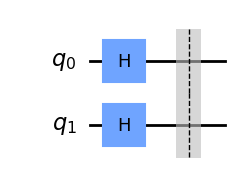

In [2]:
circ = QuantumCircuit(2)

circ.h(0)
circ.h(1)

circ.barrier()

circ.draw('mpl')

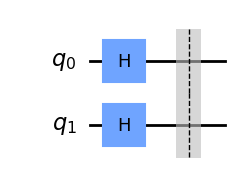

In [3]:
circ.draw("mpl")

## Etape 3 :
Pour simuler l'intervention d'Aïka, on utilise un Oracle. Un Oracle est une fonction qui prend en entrée un Qbit et renvoie 1 si le Qbit est dans l'état |1> et 0 si le Qbit est dans l'état |0>. Dans notre cas, l'Oracle renvoie 1 si le Qbit est dans l'état |1> et -1 si le Qbit est dans l'état |0>. Pour cela, on utilise une porte Z qui effectue une rotation de 180 degrés autour de l'axe Z, ce qui inverse la phase de l'état 1. Par exemple, elle peut transformer l'état + en l'état -.

In [4]:
circ.x([0,1])
circ.cz(0,1)
circ.x([0,1])
circ.barrier(range(2))

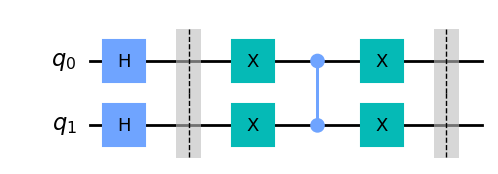

In [5]:
circ.draw('mpl')

Un diffuseur est utilisé pour superposer l'état initial sur tous les autres états en appliquant la phase inversée spécifique à chaque état.

In [6]:
circ.h([0,1])
circ.z([0,1])
circ.cz(0, 1)
circ.h([0,1])

circ.barrier()

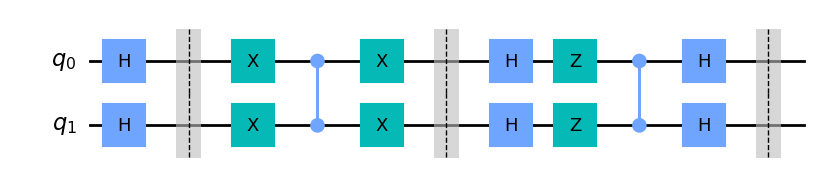

In [7]:
circ.draw('mpl')

## Etape 4 :
Mesure des qbits

In [8]:
circ.measure_all()

In [9]:
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(circ, simulator)
job = simulator.run(compiled_circuit, shots=10000)
result_sim = job.result()
counts = result_sim.get_counts(compiled_circuit)
print(counts)

{'00': 10000}


## Etape 5 :
Affichage des résultats

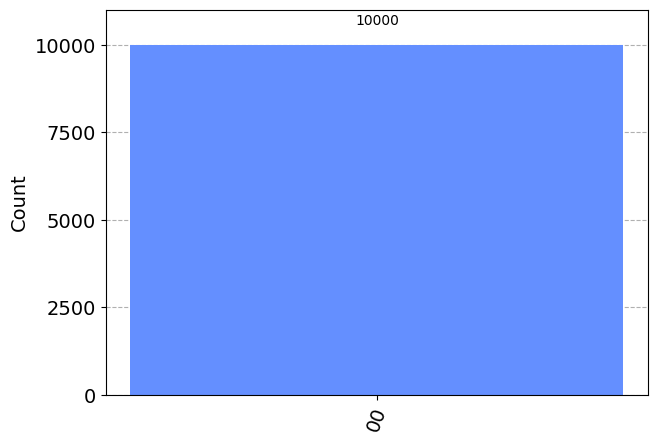

In [10]:
plot_histogram(counts)